In [129]:
import os
import numpy as np
from bitstring import Bits
import matplotlib.pyplot as plt

In [143]:
DATAPATH = "data"
data = []

print(os.listdir(DATAPATH))

['INL_ideal_SW_ideal_CDAC.csv', 'sine_4.4725M_mismatch_1.csv', 'spectrum_4.91M_4096.csv', 'sine_4.4725M_2048.csv', 'spectrum_12.49M_4096.csv', 'INL_TG_ideal_CDAC.csv', 'out (1).csv', 'spectrum_4.47M_4096.csv', 'INL_mismatch_3_noisy.csv', 'spectrum_4.47M_4096_conservative.csv', 'sine_2.33M_2048.csv', 'spectrum_2.31M_4096.csv', 'test.csv', 'INL_enhanced_TG_ideal_CDAC.csv', 'sine_2.33M_512.csv', 'sine_0.31M_mismatch_1.csv', 'spectrum_6.01M_4096.csv', 'spectrum_3.31M_4096.csv', 'spectrum_8.53M_4096.csv', 'INL_pismatch_1_noisy_unbalance.csv', 'sine_4.4725M_2048_liberal.csv', 'spectrum_1.31M_4096.csv', 'INL_mismatch_1_noisy.csv', 'spectrum_0.31M_4096.csv', 'spectrum_3.81M_4096.csv', 'sine_0.2303M_mismatch_1.csv']


In [153]:
signal_freq = 4.47e6
file_name = "spectrum_4.47M_4096_conservative.csv"

with open(os.path.join(DATAPATH, file_name)) as f:
    data = f.readlines()

In [154]:
spectrum = np.zeros((len(data) - 1, 2))

for i in range(1, len(data)):
    temp = data[i].split(",")
    spectrum[i - 1, 0] = temp[0]
    spectrum[i - 1, 1] = temp[1]

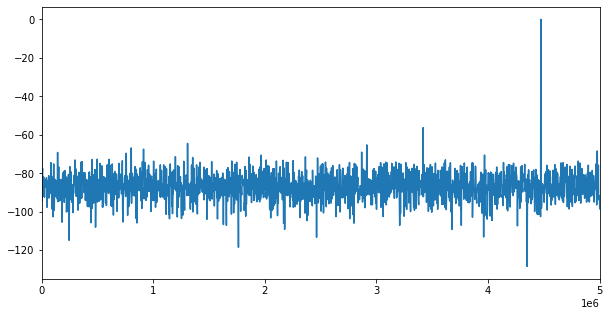

In [155]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(spectrum[:,0], spectrum[:,1])
plt.xlim(0, 5e6)
plt.show()

In [169]:
freq_resolution = 2.5e3

sfdr = max(
    max(spectrum[1 : int(signal_freq / freq_resolution) - 1, 1]),
    max(spectrum[int(signal_freq / freq_resolution) + 2: , 1])
) * (-1)

total_noise_power = 0
print(int(signal_freq / freq_resolution))
print(spectrum[1780:1800])
for i in range(1, len(spectrum)):
    if((int(signal_freq / freq_resolution) - 2< i) and (int(signal_freq / freq_resolution) + 2 > i)):
        pass
    else:
        amplitude = 10 ** (spectrum[i, 1] / 20)
        total_noise_power += amplitude ** 2

print(total_noise_power)
snr = -10 * np.log10(total_noise_power)
enob = (snr - 1.76) / 6.02

print("SFDR:    {:6.2f} dB".format(sfdr))
print("SNDR:    {:6.2f} dB".format(snr))
print("ENOB:    {:6.2f} Bit".format(enob))

1788
[[ 4.450e+06 -8.745e+01]
 [ 4.453e+06 -8.884e+01]
 [ 4.455e+06 -8.369e+01]
 [ 4.458e+06 -8.647e+01]
 [ 4.460e+06 -1.012e+02]
 [ 4.462e+06 -8.514e+01]
 [ 4.465e+06 -8.610e+01]
 [ 4.467e+06 -8.871e+01]
 [ 4.470e+06 -1.025e+02]
 [ 4.473e+06  9.149e-03]
 [ 4.475e+06 -8.813e+01]
 [ 4.478e+06 -9.809e+01]
 [ 4.480e+06 -9.578e+01]
 [ 4.483e+06 -8.525e+01]
 [ 4.485e+06 -8.577e+01]
 [ 4.488e+06 -8.757e+01]
 [ 4.490e+06 -8.791e+01]
 [ 4.493e+06 -8.926e+01]
 [ 4.495e+06 -9.060e+01]
 [ 4.498e+06 -8.610e+01]]
1.379371651802847e-05
SFDR:     56.28 dB
SNDR:     48.60 dB
ENOB:      7.78 Bit
